In [2]:
# Doing the necessary imports
%pylab inline
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image",cmap="gray")
from collections import Counter

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
dataset=pd.read_csv(r'D:\ML course practise\machine learning algorithm\Clustering\Mall_Customers.csv')

In [4]:
#dataset
data=dataset.iloc[:,3:]
data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


In [5]:
data=data.to_numpy()

In [6]:
from scipy.spatial.distance import cdist
ds = cdist(data,data)

In [7]:
from scipy.cluster.hierarchy import *
lm = linkage(ds,"single")
lm[:5]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


array([[ 48.        ,  49.        ,   0.        ,   2.        ],
       [ 65.        ,  68.        ,   0.        ,   2.        ],
       [156.        , 158.        ,   0.        ,   2.        ],
       [129.        , 131.        ,   0.        ,   2.        ],
       [ 10.        ,  14.        ,   8.67079018,   2.        ]])

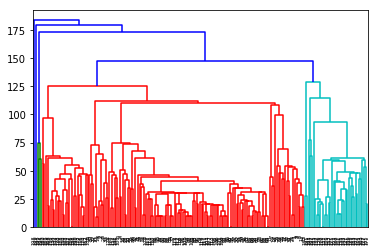

In [8]:
_=dendrogram(lm)

In [9]:
#Defining a method to plot the clusters
ccolors = ['go', 'ro','bo','mo','co','yo']
def plotclusters(data,centers=None):
    xlim([0,100]); ylim([0,100])
    if centers is None:
        plot(data[:,0],data[:,1],'bo',markersize=5)
    else:
        for i in range(amax(centers)+1):
            plot(data[centers==i,0],data[centers==i,1],ccolors[i%len(ccolors)],markersize=5)

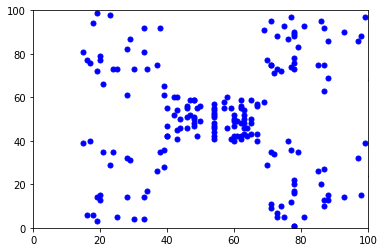

In [10]:
plotclusters(data)

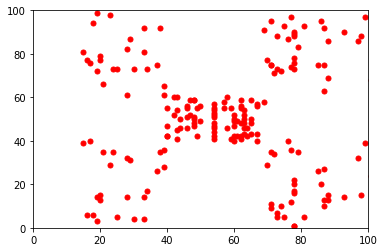

In [11]:
## Plotting the individual clusters
plotclusters(data,fcluster(lm,2,criterion='maxclust'))

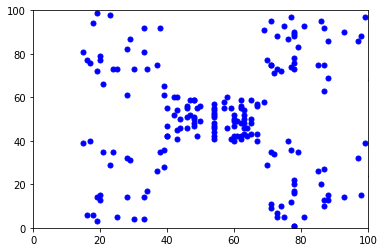

In [12]:
assignment = fclusterdata(data,4,metric='euclidean',method='single',criterion='maxclust')
plotclusters(data,assignment)

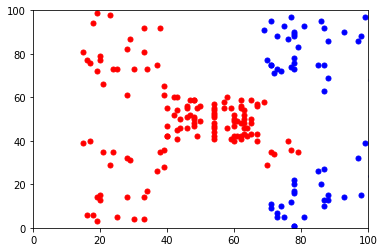

In [13]:
assignment = fclusterdata(data,2,metric='euclidean',method='complete',criterion='maxclust')
plotclusters(data,assignment)

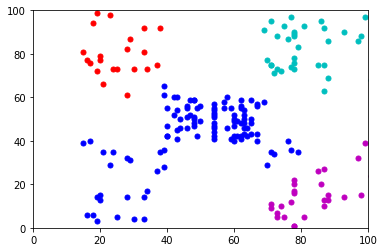

In [14]:
assignment = fclusterdata(data,4,metric='euclidean',method='complete',criterion='maxclust')
plotclusters(data,assignment)

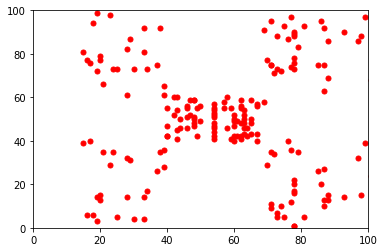

In [15]:
lm = linkage(data,metric='euclidean',method='centroid')
assignment = fcluster(lm,2,criterion='maxclust')
plotclusters(data,assignment)

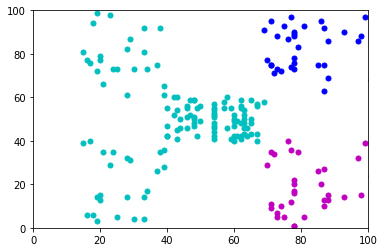

In [16]:
lm = linkage(data,metric='euclidean',method='centroid')
assignment = fcluster(lm,4,criterion='maxclust')
plotclusters(data,assignment)

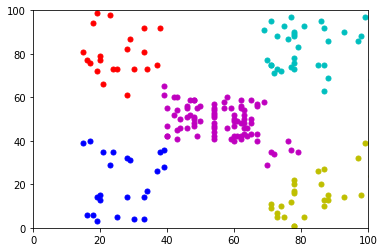

In [18]:
lm = linkage(data,metric='euclidean',method='ward')
assignment = fcluster(lm,5,criterion='maxclust')
plotclusters(data,assignment)

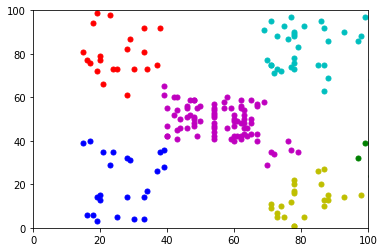

In [19]:
lm = linkage(data,metric='euclidean',method='ward')
assignment = fcluster(lm,6,criterion='maxclust')
plotclusters(data,assignment)